In [55]:
# Import the necessary libraries and sanity check the current directory
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
!pwd

/home/be131-09/GIT/Computational-Biology/Lab8


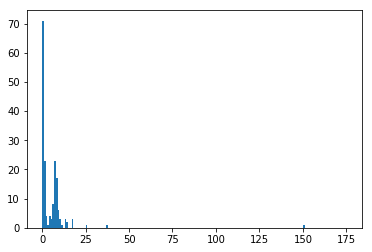

the average coverage 14.047804437500002


In [77]:
# Extract the coverage information from fasta file, create a list and plot the histogram
command_output = !grep '>' contigs.fasta | cut -d "_" -f6
coverage_list = list(map(float, command_output ))
plt.hist(coverage_list, range(len(coverage_list)))
plt.show()

print("the average coverage", np.mean(coverage_list))

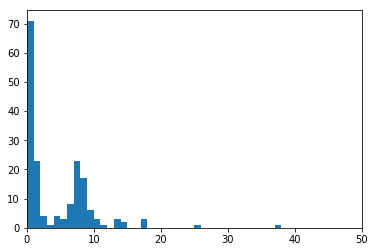

In [76]:
# A enlarged view of the histogram in range (0,50)
plt.hist(coverage_list, range(len(coverage_list)))

plt.xlim(left=0, right = 50)
plt.show()

In [86]:
# Locate the RNA genes with rna_hmm3.py and ouput to rRNA_locate in GFF
! rna_hmm3.py -i contigs.fasta -o rRNA_locate

In [87]:
# Delete the lines that don't contain the string '16S' and ouput the results
! sed -i '/16S/!d' rRNA_locate
! cat rRNA_locate

NODE_23_length_103367_cov_10.081286	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA
NODE_18_length_154232_cov_9.584186	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA
NODE_5_length_327223_cov_9.241629	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA
NODE_6_length_298784_cov_8.918606	rna_hmm3	rRNA	13926	15470	0	+	NA	16S_rRNA
NODE_4_length_332509_cov_9.114046	rna_hmm3	rRNA	137012	138556	0	-	NA	16S_rRNA
NODE_2_length_378948_cov_10.006665	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA


In [88]:
# Extract nucleic acid sequences of the genes identified and write to a fasta file
! bedtools getfasta -fi contigs.fasta -bed rRNA_locate > 16S_rRNA.fasta